# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set unit for API output
unit = 'imperial'
#set url for API search
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={unit}&q="
#create empty lists for API data to be stored
temperature =[]
humidity = []
cloudiness = []
windspeed = []
lat = []
lon = []
foundcities = []
country =[]
date =[]
#run API search loop for cities list
for city in cities:
    weathercheck = requests.get(url+city).json()
#setting up exeptions and appending to lists  
    try:
        foundcities.append(weathercheck["name"])
        temperature.append(weathercheck["main"]["temp_max"])
        humidity.append(weathercheck["main"]["humidity"])
        cloudiness.append(weathercheck["clouds"]["all"])
        windspeed.append(weathercheck["wind"]["speed"])
        lat.append(weathercheck["coord"]["lat"])
        lon.append(weathercheck["coord"]["lon"])
        country.append(weathercheck["sys"]["country"])
        date.append(weathercheck["dt"])
        print(f'{city} found and info added')
    except:
        print(f'{city}: was not found, skipping....')
        pass



vardo found and info added
albany found and info added
geraldton found and info added
east london found and info added
nishihara found and info added
tsihombe: was not found, skipping....
cockburn town found and info added
ribeira grande found and info added
caconda found and info added
waipawa found and info added
ponta do sol found and info added
hobart found and info added
carnarvon found and info added
illoqqortoormiut: was not found, skipping....
ponta delgada found and info added
dikson found and info added
buala found and info added
tasiilaq found and info added
rikitea found and info added
rio grande found and info added
hermanus found and info added
saskylakh found and info added
ushuaia found and info added
sobolevo found and info added
yellowknife found and info added
dubbo found and info added
pangai found and info added
saint-philippe found and info added
cukai found and info added
nome found and info added
sao filipe found and info added
busselton found and info added
kar

makarov found and info added
beidao found and info added
uthal found and info added
maceio found and info added
williston found and info added
srikakulam found and info added
namatanai found and info added
bandarbeyla found and info added
dosso found and info added
aguililla found and info added
arraial do cabo found and info added
taoudenni found and info added
korla found and info added
patti found and info added
paamiut found and info added
leningradskiy found and info added
burnie found and info added
mina found and info added
weligama found and info added
tepic found and info added
moose factory found and info added
sungairaya found and info added
sisimiut found and info added
portel found and info added
talara found and info added
pemangkat found and info added
santa cruz found and info added
lanzhou found and info added
nizhneyansk: was not found, skipping....
puke found and info added
la union found and info added
makat found and info added
yarmouth found and info added
harper 

flin flon found and info added
banda aceh found and info added
niono found and info added
itarema found and info added
pingzhuang found and info added
manadhoo found and info added
petropavlovsk-kamchatskiy found and info added
buin found and info added
kropotkin found and info added
rolim de moura: was not found, skipping....
kaitangata found and info added
santhia found and info added
qiqihar found and info added
gashua found and info added
tuatapere found and info added
jalu found and info added
beysehir found and info added
emerald found and info added
gorno-chuyskiy: was not found, skipping....
eldikan: was not found, skipping....
shadrinsk found and info added
taree found and info added
great yarmouth found and info added
biltine found and info added
rafaela found and info added
guymon found and info added
nola found and info added
shirokiy found and info added
batticaloa found and info added
isoka found and info added
marystown found and info added
champerico found and info adde

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#creating DataFrame from Lists created from APIs
CityWeather_df = pd.DataFrame({"City": foundcities,
                               "Country": country,
                                "Temperature": temperature,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed":windspeed,
                                "Date": date,
                                "Longitude": lon,
                                "Latitude": lat
                               }
                             )

In [5]:
#display new dataFrame
CityWeather_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Date,Longitude,Latitude
0,Vardø,NO,48.20,66,51,12.75,1592919475,31.11,70.37
1,Albany,US,81.00,63,58,7.58,1592919303,-73.97,42.60
2,Geraldton,AU,59.00,82,90,5.82,1592919480,114.60,-28.77
3,East London,ZA,80.60,24,0,5.82,1592919480,27.91,-33.02
4,Nishihara,JP,82.40,94,40,4.85,1592919481,127.76,26.18
...,...,...,...,...,...,...,...,...,...
579,Jurm,AF,78.40,28,62,0.87,1592919602,70.83,36.86
580,Yenangyaung,MM,88.52,61,17,12.26,1592919602,94.88,20.47
581,Praia,CV,86.00,51,0,21.92,1592919602,-23.51,14.92
582,Byron Bay,AU,52.00,62,0,12.75,1592919603,153.62,-28.65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Filtering out cities that have humidities that are not feasable.
toohumid = CityWeather_df.loc[CityWeather_df['Humidity'] > 100]
CityWeather_df=CityWeather_df.loc[CityWeather_df['Humidity']<=100]

In [7]:
#  Get the indices of cities that have humidity over 100%.
print(f'There are {len(toohumid)} entries with humidity over 100%')

There are 0 entries with humidity over 100%


In [8]:
#making sure all varables are equal and no missing data
counts = CityWeather_df.count()
countsinfo = CityWeather_df.describe()
print(counts)
countsinfo


City           584
Country        584
Temperature    584
Humidity       584
Cloudiness     584
Windspeed      584
Date           584
Longitude      584
Latitude       584
dtype: int64


,Temperature,Humidity,Cloudiness,Windspeed,Date,Longitude,Latitude
count,584.000000,584.000000,584.000000,584.000000,5.840000e+02,584.000000,584.000000
mean,71.093579,64.993151,45.883562,8.128682,1.592920e+09,18.217209,20.924195
std,16.023465,24.269145,38.314803,5.563842,7.259393e+01,90.251258,33.120530
min,31.150000,3.000000,0.000000,0.290000,1.592919e+09,-179.170000,-54.800000
25%,60.667500,49.000000,2.000000,3.960000,1.592919e+09,-62.227500,-7.402500
50%,73.400000,72.000000,40.000000,6.930000,1.592920e+09,23.915000,26.050000
75%,81.682500,83.000000,88.250000,11.147500,1.592920e+09,92.055000,48.862500
max,114.600000,100.000000,100.000000,48.320000,1.592920e+09,179.320000,78.220000


In [9]:
# Extract relevant fields from the data frame
scatterplotdata = CityWeather_df[['City', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Windspeed']]

# Export the City_Data into a csv
scatterplotdata.to_csv(r'/Users/specky3512/GitHub/python-API-challenge/output_data/DataforScatterplots.csv', index = False)

scatterplotdata.head(20)

,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Vardø,70.37,48.20,66,51,12.75
1,Albany,42.60,81.00,63,58,7.58
2,Geraldton,-28.77,59.00,82,90,5.82
3,East London,-33.02,80.60,24,0,5.82
4,Nishihara,26.18,82.40,94,40,4.85
5,Cockburn Town,21.46,84.20,79,40,11.41
6,Ribeira Grande,38.52,68.00,72,75,17.22
7,Caconda,-13.73,77.09,18,0,4.54
8,Waipawa,-41.41,48.20,87,2,8.05
9,Ponta do Sol,32.67,71.60,68,40,9.17


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

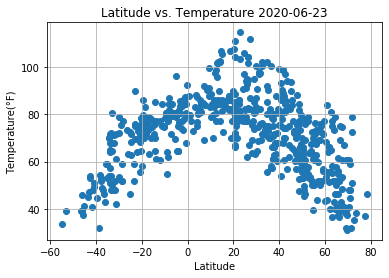

In [10]:
#creating x & y var
#x var will be able to be used in all charts and will not have to be recreated
x = scatterplotdata['Latitude']
y1 = scatterplotdata['Temperature']
#plotting scatter
plt.scatter(x,y1)
#adding labels & Title
plt.xlabel('Latitude')
plt.ylabel('Temperature(°F)')
plt.title(f'Latitude vs. Temperature {today}')
#adding Grid
plt.grid()
#saving figure
plt.savefig(f'../output_data/Latitude vs. Temperature {today}.png')
plt.show()


## Latitude vs. Humidity Plot

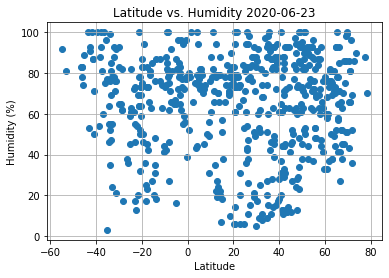

In [11]:
#create var for humidity
y2 = scatterplotdata['Humidity']
#plot scatter graph
plt.scatter(x,y2)
#adding titles/labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity {today}')
plt.grid()
#saving figure
plt.savefig(f'../output_data/Latitude vs. Humidity {today}.png')
plt.show()


## Latitude vs. Cloudiness Plot

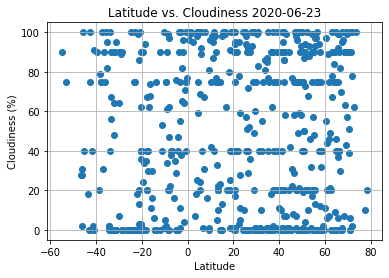

In [12]:
#creating var for cloudiness
y3 = scatterplotdata['Cloudiness']
#plotting scatter
plt.scatter(x,y3)
#adding titels/labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness {today}')
plt.grid()
#saving figure
plt.savefig(f'../output_data/Latitude vs. Cloudiness {today}.png')
plt.show()

## Latitude vs. Wind Speed Plot

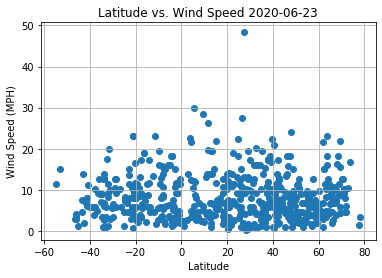

In [13]:
#creating var for windspeed
y4 = scatterplotdata['Windspeed']
#creating scatter plot
plt.scatter(x,y4)
#adding title/labesl
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f'Latitude vs. Wind Speed {today}')
plt.grid()
#saving figure
plt.savefig(f'../output_data/Latitude vs. Wind Speed {today}.png')
plt.show()

## Linear Regression

In [14]:
# Create a function to create Linear Regression plots. The function also takes in var for line equation placement on charts
# a couple print statements to print the r-squre value and line equation and adding labels to charts that are going to be the same
def linerarregress(x,y,a,b,c):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
    plt.scatter(x,y, color='blue')
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(a,b),fontsize=15, color='red')
    plt.grid()
    plt.xlabel('Latitude')
    plt.ylabel(f'{c}')

In [15]:
# Create Northern and Southern Hemisphere DataFrames
Northern = scatterplotdata[scatterplotdata['Latitude'] >= 0]

Southern = scatterplotdata[scatterplotdata['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6896625549086965
y=-0.6x+96.25


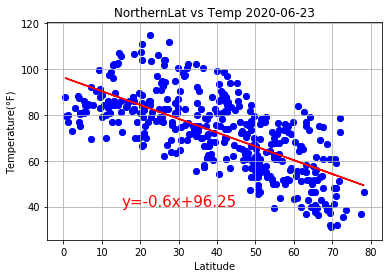

In [16]:
#setting x var for norther latitude point and setting y var
x_north = Northern["Latitude"]
y_nTemp = Northern["Temperature"]
#making scatter plot
plt.scatter(x_north,y_nTemp)
#adding title
plt.title(f'NorthernLat vs Temp {today}')
#running linear regression function
linerarregress(x_north,y_nTemp,15,40,"Temperature(°F)")
#saving figure
plt.savefig(f'../output_data/NorthernLat vs Temp {today}.png')
plt.show()

The linear regression for the Northern Hemisphere vs Temp shows that as you move further north(larger Latitude) from the equator, that the temperature is cooler

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.777496699590993
y=0.8x+84.85


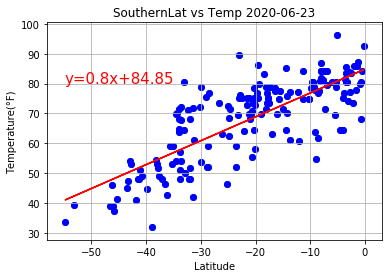

In [17]:
#setting x var for southern latitude point and setting y var
x_south = Southern["Latitude"]
y_sTemp = Southern["Temperature"]
#creating scatter plot
plt.scatter(x_south, y_sTemp)
#adding title
plt.title(f'SouthernLat vs Temp {today}')
#calling linear regression fuction
linerarregress(x_south, y_sTemp,-55,80,"Temperature(°F)")
#saving figure
plt.savefig(f'../output_data/SouthernLat vs Temp {today}.png')
plt.show()

In the above regression, you can see that the corralation is that as you move further south(more negitive Latitude) that the temperatures become cooler

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.06652611897665767
y=0.09x+60.52


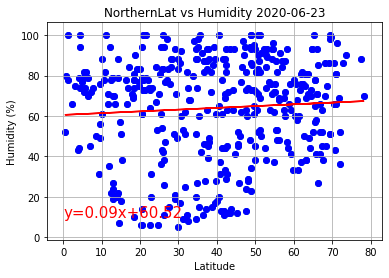

In [18]:
#setting y var
y_nHum = Northern["Humidity"]
#creating scatter plot
plt.scatter(x_north, y_nHum)
#adding title
plt.title(f'NorthernLat vs Humidity {today}')
#calling linear regression function
linerarregress(x_north, y_nHum,0,10,'Humidity (%)')
#saving figure
plt.savefig(f'../output_data/NorthernLat vs Humidity {today}.png')
plt.show()

This regression show that there is no real corrilation between humidity and Latitude in this Norther Hempishere dataset. This shows that there is most likly a different factor that affects humitity. I belevie that you would have to look more into the longitude as well and the location of where the city is located to large bodies of water.  hence costal cities are cities in swampy areas will have higher humidity than cities located in dry areas.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.08127935530362392
y=-0.13x+64.49


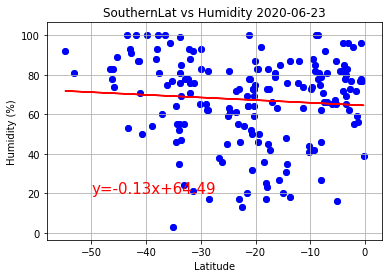

In [19]:
#setting y var
y_sHum=Southern["Humidity"]
#creating scatter plot
plt.scatter(x_south,y_sHum)
#adding title
plt.title(f'SouthernLat vs Humidity {today}')
#calling linear regression function
linerarregress(x_south,y_sHum,-50,20,'Humidity (%)')
#saving figure
plt.savefig(f'../output_data/SouthernLat vs Humidity {today}.png')
plt.show()


This regression show that there is a slightly stronger corrilation between humidity and Latitude in the Southern Hemishere dataset. This could be due to where the cities that are being called are located.  It could also be due to the fact that there are less datapoint in the Southern Hemisphere data than the Norther Hemisphere data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.028980617385565028
y=-0.06x+50.35


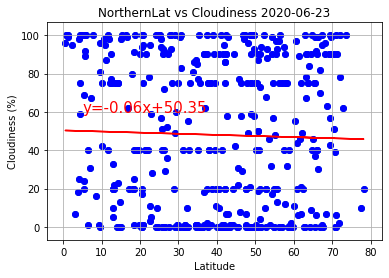

In [20]:
#setting y var
y_nClo = Northern["Cloudiness"]
#creating scatter plot
plt.scatter(x_north,y_nClo)
#adding title
plt.title(f'NorthernLat vs Cloudiness {today}')
#calling linear regression function
linerarregress(x_north,y_nClo,5,60,"Cloudiness (%)")
#saving figure
plt.savefig(f'../output_data/NorthernLat vs Cloudiness {today}.png')
plt.show()


The regression of Northern Hemisphere cities vs Cloudiness has a weak corrilation.   The data is all over the place and the line of regression is almost flat.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.02026514699215763
y=0.06x+42.18


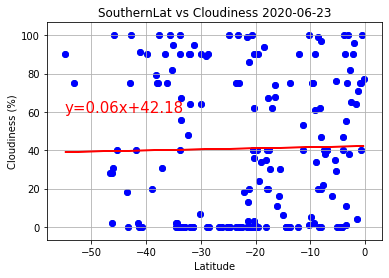

In [21]:
#setting y var
y_sClo = Southern["Cloudiness"]
#creating scatter plot
plt.scatter(x_south,y_sClo)
#adding title
plt.title(f'SouthernLat vs Cloudiness {today}')
#calling linear regression function
linerarregress(x_south,y_sClo,-55,60,"Cloudiness (%)")
#saving figure
plt.savefig(f'../output_data/SouthernLat vs Cloudiness {today}.png')
plt.show()


The Southern Hemisphere cities vs Cloudiness has a slightly stronger corrilation, but is still weak.
It could also be due to the fact that there are less datapoint in the Southern Hemisphere data than the Norther Hemisphere data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.057394875508179226
y=-0.02x+8.78


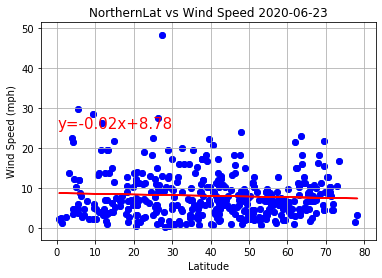

In [22]:
#setting y var
y_nWind= Northern["Windspeed"]
#creating scatter plot
plt.scatter(x_north, y_nWind)
#adding title
plt.title(f'NorthernLat vs Wind Speed {today}')
#calling linear regression function
linerarregress(x_north, y_nWind,0,25, "Wind Speed (mph)")
#saving figure
plt.savefig(f'../output_data/NorthernLat vs WindSpeed {today}.png')
plt.show()

The regression of Northern Hemisphere cities vs WindSpeed has a weak corrilation.   The data is all over the place and the line of regression is almost flat.  You could look at the complete coordinete set and compare where the cities are located vs where the path of jet streams are located to see if that has a high effect on the wind speeds of the cities

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.07688208102534823
y=0.03x+8.81


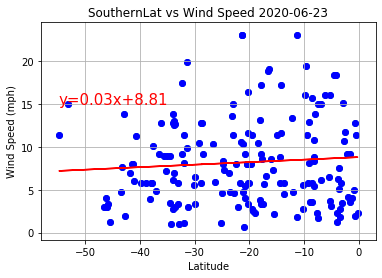

In [23]:
#setting y var
y_sWind = Southern["Windspeed"]
#creating scatter plot
plt.scatter(x_south, y_sWind)
#adding title
plt.title(f'SouthernLat vs Wind Speed {today}')
#calling linear regression function
linerarregress(x_south, y_sWind,-55,15,"Wind Speed (mph)")
#saving figure
plt.savefig(f'../output_data/SouthernLat vs Windspeed {today}.png')
plt.show()


The Southern Hemisphere cities vs Cloudiness has a slightly stronger corrilation, but is still weak.
It could also be due to the fact that there are less datapoint in the Southern Hemisphere data than the Norther Hemisphere data.